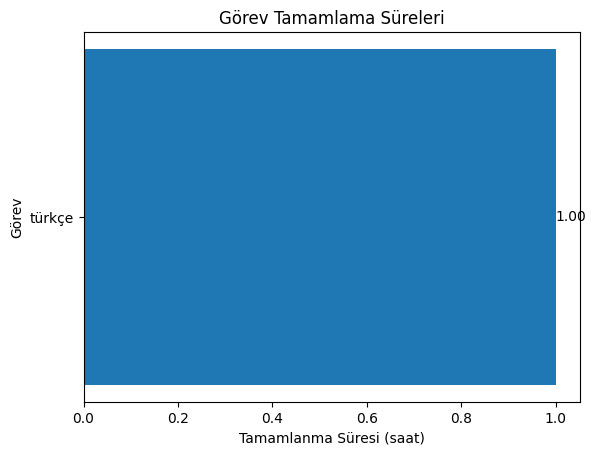

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt

# Boş bir görev listesi oluştur
tasks = []

# Kullanıcıdan görevleri ve başlama/bitiş saatlerini al
while True:
    task_name = input("Yapmak istediğiniz görevi girin (Çıkmak için 'q' tuşuna basın): ")
    if task_name == 'q':
        break
    
    start_time = input("Görevi ne zaman başladınız? (HH:MM): ")
    end_time = input("Görevi ne zaman bitirdiniz? (HH:MM): ")
    
    task = {
        'görev': task_name,
        'başlama': datetime.strptime(start_time, "%H:%M"),
        'bitiş': datetime.strptime(end_time, "%H:%M")
    }
    
    tasks.append(task)

# Görevleri tamamlanma sürelerine göre sırala
tasks.sort(key=lambda x: x['bitiş'] - x['başlama'])

# Grafik oluştur
task_names = [task['görev'] for task in tasks]
task_durations = [(task['bitiş'] - task['başlama']).total_seconds() / 3600 for task in tasks]

plt.barh(task_names, task_durations)
plt.xlabel('Tamamlanma Süresi (saat)')
plt.ylabel('Görev')
plt.title('Görev Tamamlama Süreleri')

# Tamamlanma sürelerini çubukların üzerine yazdır
for i, duration in enumerate(task_durations):
    plt.text(duration, i, f"{duration:.2f}", ha='left', va='center')

plt.show()


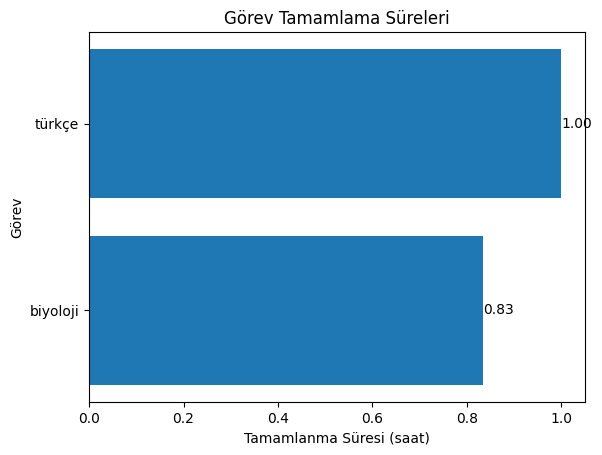

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt

# Boş bir görev listesi oluştur
tasks = []

# Kullanıcıdan görevleri ve başlama/bitiş saatlerini al
while True:
    task_name = input("Yapmak istediğiniz görevi girin (Çıkmak için 'q' tuşuna basın): ")
    if task_name == 'q':
        break
    
    start_time = input("Görevi ne zaman başladınız? (HH:MM): ")
    end_time = input("Görevi ne zaman bitirdiniz? (HH:MM): ")
    
    task = {
        'görev': task_name,
        'başlama': datetime.strptime(start_time, "%H:%M"),
        'bitiş': datetime.strptime(end_time, "%H:%M")
    }
    
    tasks.append(task)

# Görevleri tamamlanma sürelerine göre sırala
tasks.sort(key=lambda x: x['bitiş'] - x['başlama'])

# Grafik oluştur
task_names = [task['görev'] for task in tasks]
task_durations = [(task['bitiş'] - task['başlama']).total_seconds() / 3600 for task in tasks]

plt.barh(task_names, task_durations)
plt.xlabel('Tamamlanma Süresi (saat)')
plt.ylabel('Görev')
plt.title('Görev Tamamlama Süreleri')

# Tamamlanma sürelerini çubukların üzerine yazdır
for i, duration in enumerate(task_durations):
    plt.text(duration, i, f"{duration:.2f}", ha='left', va='center')

plt.show()

# Her görevi ayrı bir dosyada göster
for i, task in enumerate(tasks):
    task_name = task['görev']
    task_duration = task_durations[i]
    start_time = task['başlama']
    end_time = task['bitiş']
    
    with open(f"betul.csv", "a") as file:
        file.write(f"Görev: {task_name}\n")
        file.write(f"Başlama Saati: {start_time.strftime('%H:%M')}\n")
        file.write(f"Bitiş Saati: {end_time.strftime('%H:%M')}\n")
        file.write(f"Tamamlanma Süresi: {task_duration:.2f} saat\n")


In [ ]:
with open(f"{task_name}.txt", "w") as file:
        file.write(f"Görev: {task_name}\n")
        file.write(f"Başlama Saati: {start_time.strftime('%H:%M')}\n")
        file.write(f"Bitiş Saati: {end_time.strftime('%H:%M')}\n")
        file.write(f"Tamamlanma Süresi: {task_duration:.2f} saat\n")


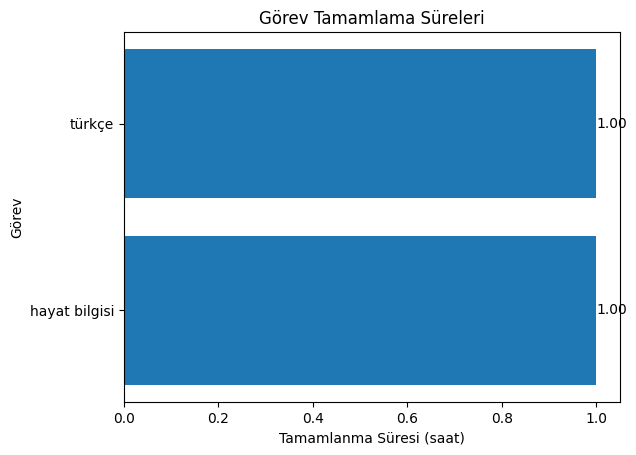

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tkinter as tk
from tkinter import messagebox

class ToDoList:
    def __init__(self):
        self.tasks = []
    
    def add_task(self, task_name, start_time, end_time):
        try:
            start = datetime.strptime(start_time, "%H:%M")
            end = datetime.strptime(end_time, "%H:%M")
        except ValueError:
            messagebox.showerror("Hata", "Geçersiz saat formatı!")
            return
        
        task = {
            'görev': task_name,
            'başlama': start,
            'bitiş': end
        }
        
        self.tasks.append(task)
        messagebox.showinfo("Başarılı", "Görev eklendi.")
    
    def show_graph(self):
        tasks = self.tasks.copy()
        tasks.sort(key=lambda x: x['bitiş'] - x['başlama'])
        
        task_names = [task['görev'] for task in tasks]
        task_durations = [(task['bitiş'] - task['başlama']).total_seconds() / 3600 for task in tasks]
        
        plt.barh(task_names, task_durations)
        plt.xlabel('Tamamlanma Süresi (saat)')
        plt.ylabel('Görev')
        plt.title('Görev Tamamlama Süreleri')
        
        for i, duration in enumerate(task_durations):
            plt.text(duration, i, f"{duration:.2f}", ha='left', va='center')
        
        plt.show()
    
    def save_to_file(self):
        try:
            df = pd.DataFrame(self.tasks)
            df['tamamlanma_süresi'] = (df['bitiş'] - df['başlama']).dt.total_seconds() / 3600
            df.to_csv('gorevler.csv', index=False)
            messagebox.showinfo("Başarılı", "Görevler dosyaya kaydedildi.")
        except Exception as e:
            messagebox.showerror("Hata", f"Dosyaya kaydetme başarısız oldu:\n{str(e)}")
    
    def run(self):
        root = tk.Tk()
        root.title("To-Do List")
        
        frame = tk.Frame(root)
        frame.pack(pady=10)
        
        lbl_task = tk.Label(frame, text="Görev:")
        lbl_task.grid(row=0, column=0, padx=5)
        
        entry_task = tk.Entry(frame, width=30)
        entry_task.grid(row=0, column=1, padx=5)
        
        lbl_start = tk.Label(frame, text="Başlama Saati (HH:MM):")
        lbl_start.grid(row=1, column=0, padx=5)
        
        entry_start = tk.Entry(frame, width=10)
        entry_start.grid(row=1, column=1, padx=5)
        
        lbl_end = tk.Label(frame, text="Bitiş Saati (HH:MM):")
        lbl_end.grid(row=2, column=0, padx=5)
        
        entry_end = tk.Entry
        entry_end = tk.Entry(frame, width=10)
        entry_end.grid(row=2, column=1, padx=5)
        
        def add_task():
            task_name = entry_task.get()
            start_time = entry_start.get()
            end_time = entry_end.get()
            
            if not task_name:
                messagebox.showerror("Hata", "Görev adı boş olamaz!")
                return
            
            self.add_task(task_name, start_time, end_time)
            
            entry_task.delete(0, tk.END)
            entry_start.delete(0, tk.END)
            entry_end.delete(0, tk.END)
        
        def show_graph():
            self.show_graph()
        
        def save_to_file():
            self.save_to_file()
        
        btn_add = tk.Button(frame, text="Görev Ekle", command=add_task)
        btn_add.grid(row=3, column=0, pady=10)
        
        btn_graph = tk.Button(frame, text="Grafik Göster", command=show_graph)
        btn_graph.grid(row=3, column=1, pady=10)
        
        btn_save = tk.Button(frame, text="Dosyaya Kaydet", command=save_to_file)
        btn_save.grid(row=3, column=2, pady=10)
        
        root.mainloop()

# ToDoList sınıfını kullanarak uygulamayı çalıştır
todo = ToDoList()
todo.run()
